In [3]:
# Import Pandas
import pandas as pd

# Import Numpy
import numpy as np

# Import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm

# Import Tensorflow
import tensorflow as tf

# Import scipy
from scipy import stats as st

# Import warnings
import warnings 
warnings.filterwarnings('ignore')

# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

# Import Missing Nap
import missingno as msno

# Import Seaborn
import seaborn as sns

# Import Bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import d3
from bokeh.io import output_notebook
from bokeh.models import Legend
output_notebook()

In [5]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [10]:
# Load the data
wine_red_df = pd.read_csv("winequality-red.csv")

In [11]:
wine_red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
# Dimension of the data
print("The Red wine dataset has", wine_red_df.shape[0], "number of observations and", 
      wine_red_df.shape[1], "variables")

The Red wine dataset has 1599 number of observations and 12 variables


In [21]:
def custom_style(title, xlab, ylab, width = 800, height = 600):
    # Create the plot
    p = figure(plot_width = width, plot_height = height, title = title, x_axis_label = xlab, y_axis_label = ylab)
    # Custom changes
    p.title.text_font_size = "20pt"
    p.title.align = "center"
    p.xaxis.axis_label_text_font_size = "20pt"
    p.yaxis.axis_label_text_font_size = "20pt"
    return p

def custom_barplot(data, width = 800, height = 600, color = "#3687cc", title = "Barplot", xlab = "Category",
                   ylab = "Counts"):
    # Get the quantity and its count from the dataset
    counts = data.value_counts()
    # Get the custom style formsts
    p = custom_style(width = width, height = height, title = title, xlab = xlab, ylab = ylab)
    
    # Call the vertical bar
    p.vbar(x = counts.index, top = counts.values, width = 0.5, bottom = 0,  color = color)
    
    # Show the plot
    return show(p)

custom_barplot(wine_red_df.quality, title = "Red Wine Quality", xlab = "Quality Level of wine (0 to 10 scale)", 
               ylab = "Counts")


In [22]:
# Quality and pH
def scatter_plot(data, x, y, title = "Scatter Plot", xlab = "X-axis", ylab ="Y-axis"):
    p = custom_style(title = title, xlab = xlab, ylab = ylab)
    data = wine_red_df
    grouped_data = [data.loc[data[x] == i, [x, y]] 
                    for i in np.unique(data[x])]
    color_list = d3['Category10'][len(grouped_data)]
    for i in range(len(grouped_data)):
        p.circle(grouped_data[i][x].tolist(), grouped_data[i][y].tolist(), size = 10, color = color_list[i])
    show(p)
    
scatter_plot(wine_red_df, x = "quality", y = "pH", title = "Red Wine's Quality vs pH", 
             xlab = "Quality Level of wine (0 to 10 scale)", ylab = "pH Content")


NameError: ignored

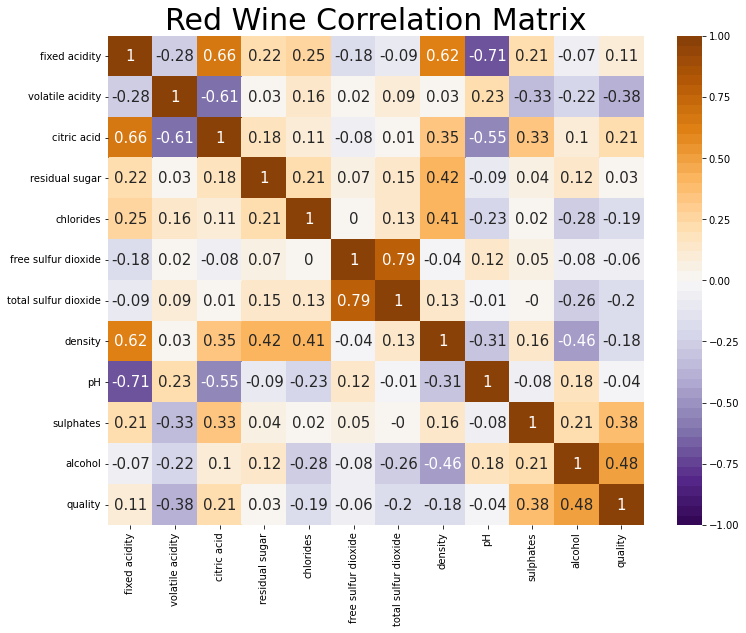

In [23]:
def confusion_matrix_plot(data, title = "Red Wine Correlation Matrix", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="spearman"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 30)
    ax.title.set_position([.5, 1.03])
    ax.set_xticklabels(labels = cor_mat.index, fontsize = 18)
    ax.set_yticklabels(labels = cor_mat.index, fontsize = 18)
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(wine_red_df, title = "Red Wine Correlation Matrix")

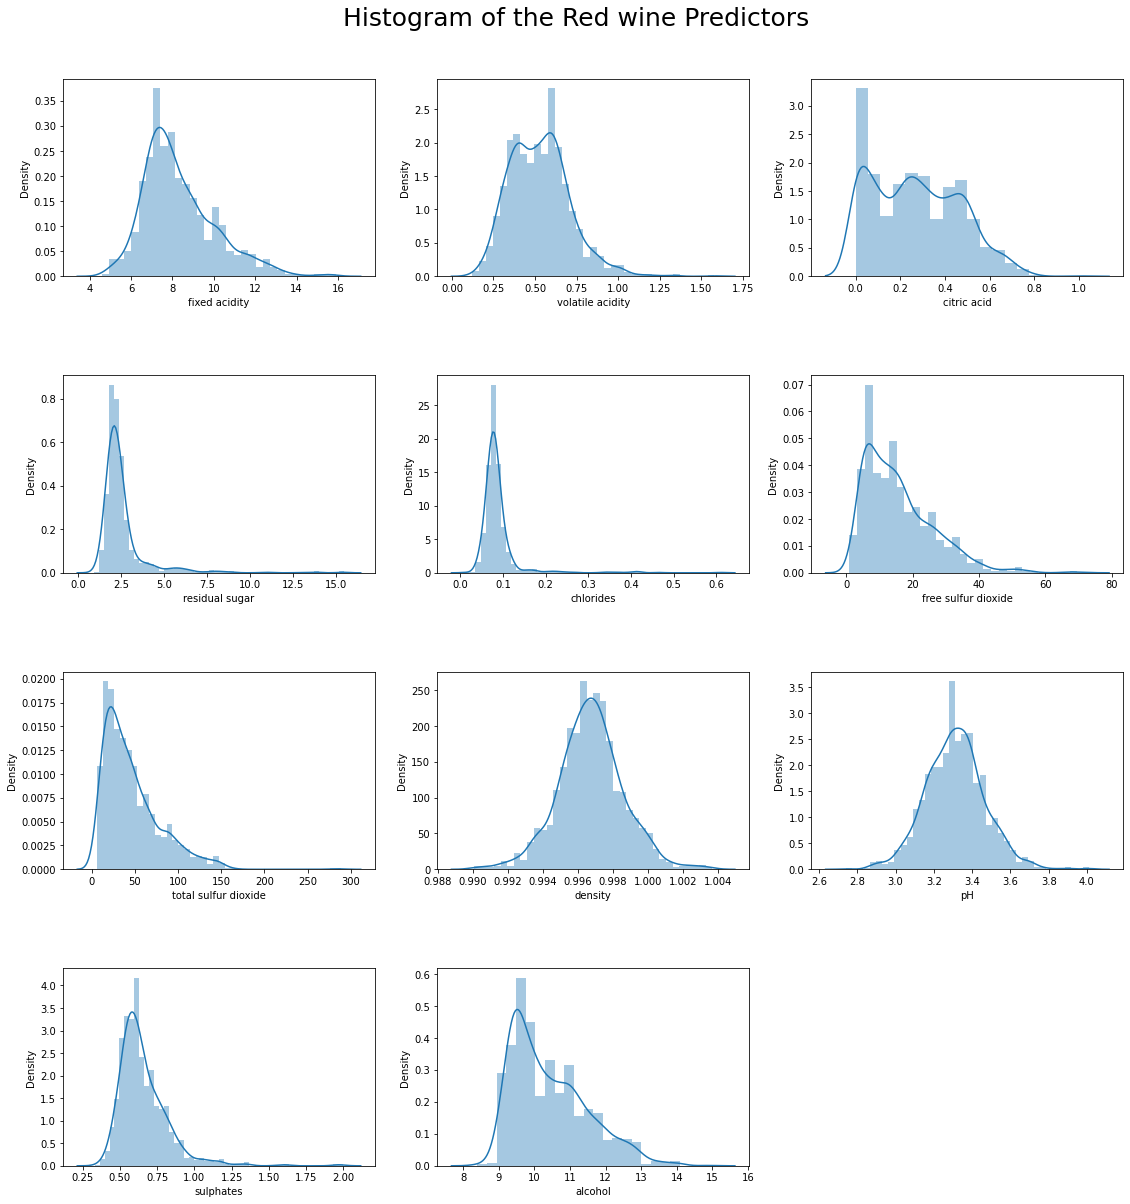

In [26]:
def subplot_hist(data, row = 4, column = 3, title = "Subplots", height = 20, width = 19):
    # Create a figure instance, and the two subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=25, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        sns.distplot(wine_red_df.iloc[:, i], ax=ax)
    # Show the plot
    plt.show()
    
subplot_hist(wine_red_df.iloc[:, :-1], row = 4, column = 3, title = "Histogram of the Red wine Predictors")

In [27]:
# Computing the skewness into dataFrame
def skewness_check(data):
    # Find the skewness in the dataset
    skew_value = list(st.skew(data))
    skew_string = []
    # Looping through the skew value to find the Skew category
    for skew in skew_value:
        if skew >= -.5 and skew <= .5:
            skew_string.append("Light Skewed")
        elif skew <= -.5 and skew >= -1 and skew <= .5 and skew >= 1:
            skew_string.append("Moderately Skewed")
        else:
            skew_string.append("Heavily Skewed")
    # Ctreating data frame
    skew_df = pd.DataFrame({'Column': data.columns, 'Skewness': skew_value, 'Skew Category': skew_string})
    return skew_df

# Skewness for Red Wine
skewness_check(wine_red_df.iloc[:, :-1])

,Column,Skewness,Skew Category
0,fixed acidity,0.981829,Heavily Skewed
1,volatile acidity,0.670962,Heavily Skewed
2,citric acid,0.318039,Light Skewed
3,residual sugar,4.536395,Heavily Skewed
4,chlorides,5.675017,Heavily Skewed
5,free sulfur dioxide,1.249394,Heavily Skewed
6,total sulfur dioxide,1.514109,Heavily Skewed
7,density,0.071221,Light Skewed
8,pH,0.193502,Light Skewed
9,sulphates,2.426393,Heavily Skewed


In [31]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(wine_red_df.iloc[:, :-1], wine_red_df.iloc[:, -1],
                                                    test_size=0.25, random_state=1)

In [33]:
# Custom functions to use the SvM model
def svm_accuracy_cv(X_train, X_test, y_train, y_test, n_fold = 10):
    # Intialize the variables
    best_score = 0
    best_C = 10000
    C_list = [1, 10, 100, 1000]
    for C in C_list:
        # Creating the SVM model 
        svc = svm.SVC(C = C, kernel = 'rbf')
        # Getting the scores on n folds
        scores = cross_val_score(svc, X_train, y_train, cv = n_fold)
        score = scores.mean()
        # Check and assign the best score paramters
        if score > best_score:
            best_C = C
            best_score = score
    # Fir the complete model over all the training data
    svc = svm.SVC(C = best_C, kernel = "rbf")
    svc.fit(X_train, y_train)
    # Get the accuracy over the teating data
    accuracy = svc.score(X_test, y_test)
    return accuracy, best_C

# Compute the accuracy
red_wine_accuracy, C_red = svm_accuracy_cv(X_train_red, X_test_red, y_train_red, y_test_red, n_fold = 10)

# Print the accuracy
print("The accuracy of the SVM model on Red wine dataset with 10 fold cross validation is", 
      round(red_wine_accuracy * 100, 2), "percentage with the best cost value of", C_red)

The accuracy of the SVM model on Red wine dataset with 10 fold cross validation is 60.75 percentage with the best cost value of 1000
